In [1]:
# Install packages

#!pip install pandas
#!pip install matplot
#!pip install scipy
#!pip install scikit-learn

In [2]:
# Load library

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error, r2_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
# File directory 
dir = "D:/XXXXXX/XXXXXXX/XXXXXXX/"

# Import data
data = pd.read_csv(dir + "depression_data.csv")

In [4]:
print(data.shape)

data.head(5)

(413768, 16)


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [5]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [6]:
# Check duplicated records
data.duplicated().sum()

np.int64(0)

In [7]:
# Check response rate
data["History of Mental Illness"].value_counts(normalize=True) * 100

History of Mental Illness
No     69.590447
Yes    30.409553
Name: proportion, dtype: float64

<Axes: title={'center': 'Income'}, xlabel='History of Mental Illness'>

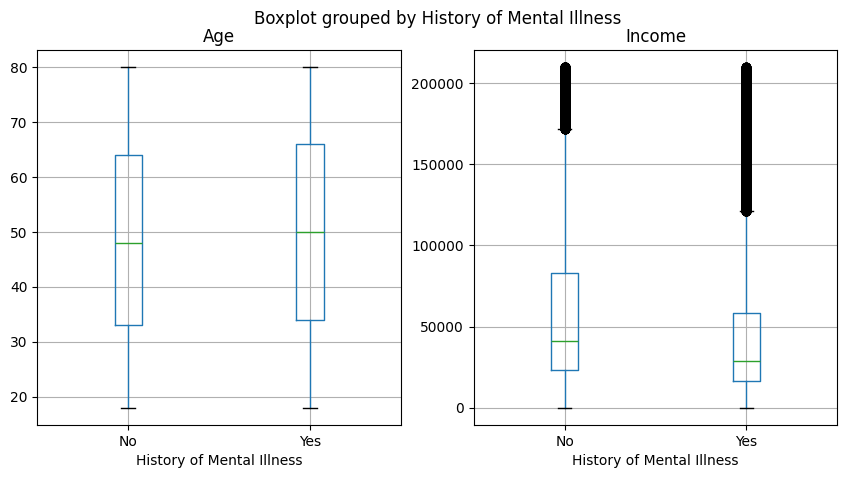

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5)) 

data.boxplot(column="Age", by="History of Mental Illness", ax=ax1)
data.boxplot(column="Income", by="History of Mental Illness", ax=ax2)

In [9]:
# Make a copy of the dataset
new_data = data.copy()

In [10]:
print(data["Education Level"].unique())

new_data["Education Level"] = new_data["Education Level"].map({"High School":0, "Associate Degree":1, "Bachelor's Degree":2,"Master's Degree":3, "PhD":4})

["Bachelor's Degree" 'High School' "Master's Degree" 'Associate Degree'
 'PhD']


In [11]:
print(data["Physical Activity Level"].unique())

new_data["Physical Activity Level"] = new_data["Physical Activity Level"].map({"Sedentary":0, "Moderate":1, "Active":2})

['Active' 'Sedentary' 'Moderate']


In [12]:
print(data["Alcohol Consumption"].unique())

new_data["Alcohol Consumption"] = new_data["Alcohol Consumption"].map({"Low":0, "Moderate":1, "High":2})

['Moderate' 'High' 'Low']


In [13]:
print(data["Dietary Habits"].unique())

new_data["Dietary Habits"] = new_data["Dietary Habits"].map({"Unhealthy":0, "Moderate":1, "Healthy":2})

['Moderate' 'Unhealthy' 'Healthy']


In [14]:
print(data["Sleep Patterns"].unique())

new_data["Sleep Patterns"] = new_data["Sleep Patterns"].map({"Poor":0, "Fair":1, "Good":2})

['Fair' 'Good' 'Poor']


In [15]:
print(data["History of Mental Illness"].unique())

new_data["History of Mental Illness"] = new_data["History of Mental Illness"].map({"No":0, "Yes":1})

['Yes' 'No']


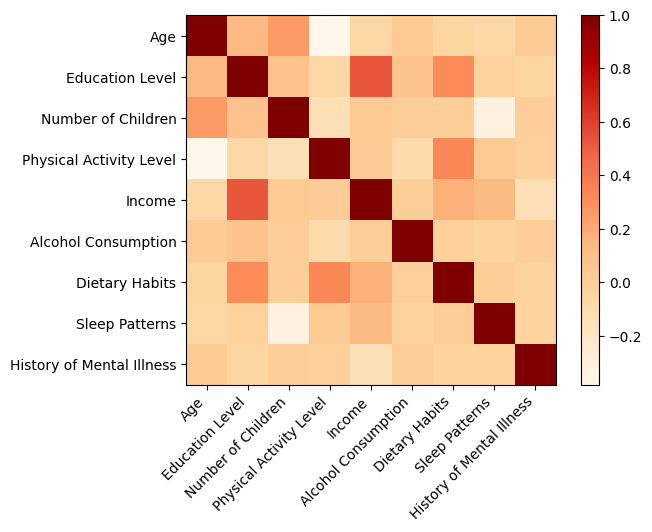

In [16]:
numerical_features = new_data.select_dtypes(include='number')

matrix = numerical_features.corr()

# plotting correlation matrix
plt.imshow(matrix, cmap='OrRd')

# adding colorbar
plt.colorbar()

# extracting variable names
variables = []
for i in matrix.columns:
    variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

The P-Value of the Chi-Squared Test is:  5.409031887961224e-14


[Text(0, 0, '29.4%'),
 Text(0, 0, '30.5%'),
 Text(0, 0, '29.7%'),
 Text(0, 0, '31.4%')]

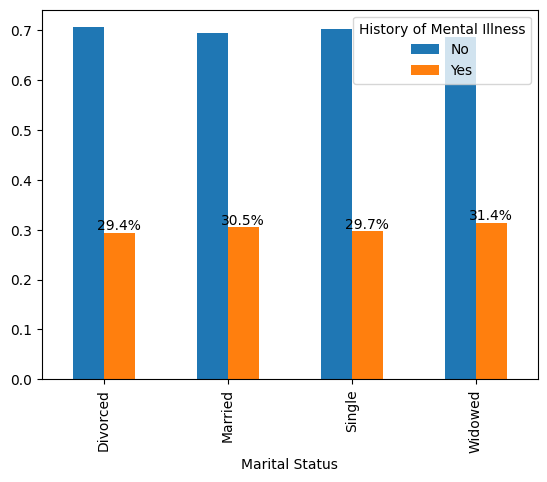

In [17]:
# Chi-squared test
ms = pd.crosstab(data["Marital Status"], data["History of Mental Illness"])

ChiSqResult = chi2_contingency(ms)
print("The P-Value of the Chi-Squared Test is: ", ChiSqResult[1])

# Distribution by marital status
ms_prop = ms.apply(lambda r: r / r.sum(), axis = 1)

ax = ms_prop.plot(kind="bar")

bars = ax.containers[1]
ax.bar_label(bars, labels = [f'{x.get_height():.1%}' for x in bars])

The P-Value of the Chi-Squared Test is:  0.0032730141384533966


[Text(0, 0, '29.9%'), Text(0, 0, '30.3%'), Text(0, 0, '30.6%')]

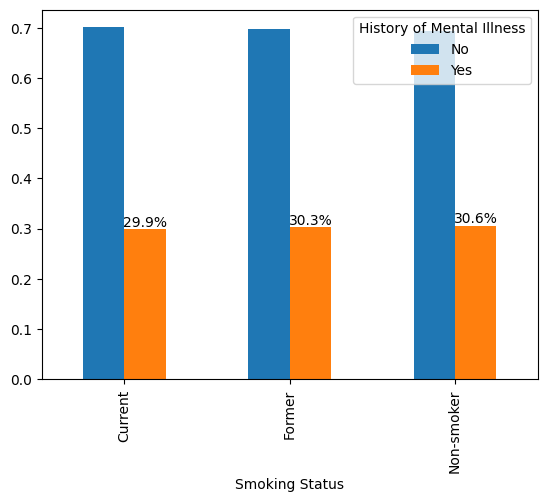

In [18]:
# Chi-squared test
ss = pd.crosstab(data["Smoking Status"], data["History of Mental Illness"])

ChiSqResult = chi2_contingency(ss)
print("The P-Value of the Chi-Squared Test is: ", ChiSqResult[1])

# Distribution by smoking status
ss_prop = ss.apply(lambda r: r / r.sum(), axis = 1)

ax = ss_prop.plot(kind="bar")

bars = ax.containers[1]
ax.bar_label(bars, labels = [f'{x.get_height():.1%}' for x in bars])

The P-Value of the Chi-Squared Test is:  0.0


[Text(0, 0, '25.6%'), Text(0, 0, '39.1%')]

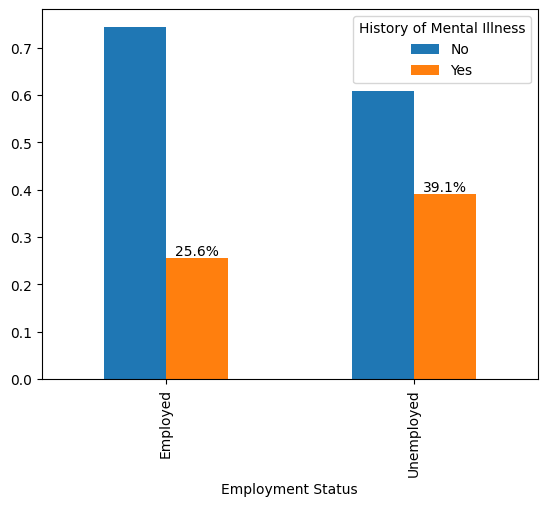

In [19]:
# Chi-squared test
es = pd.crosstab(data["Employment Status"], data["History of Mental Illness"])

ChiSqResult = chi2_contingency(es)
print("The P-Value of the Chi-Squared Test is: ", ChiSqResult[1])

# Distribution by employment status
es_prop = es.apply(lambda r: r / r.sum(), axis = 1)
ax = es_prop.plot(kind="bar")

bars = ax.containers[1]
ax.bar_label(bars, labels = [f'{x.get_height():.1%}' for x in bars])

The P-Value of the Chi-Squared Test is:  0.2666100524904718


[Text(0, 0, '30.4%'), Text(0, 0, '30.5%')]

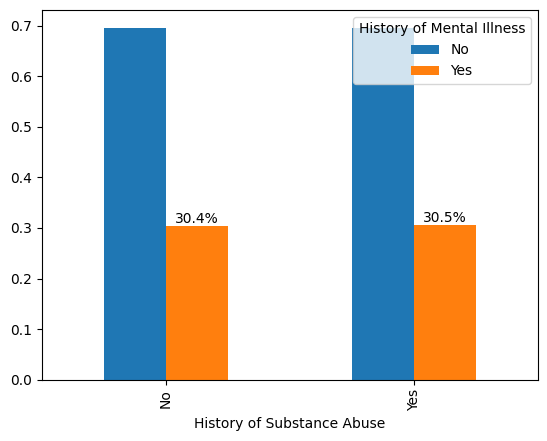

In [20]:
# Chi-squared test
sa = pd.crosstab(data["History of Substance Abuse"], data["History of Mental Illness"])

ChiSqResult = chi2_contingency(sa)
print("The P-Value of the Chi-Squared Test is: ", ChiSqResult[1])

# Distribution by employment status
sa_prop = sa.apply(lambda r: r / r.sum(), axis = 1)
ax = sa_prop.plot(kind="bar")

bars = ax.containers[1]
ax.bar_label(bars, labels = [f'{x.get_height():.1%}' for x in bars])

The P-Value of the Chi-Squared Test is:  0.0016897082070443303


[Text(0, 0, '30.3%'), Text(0, 0, '30.8%')]

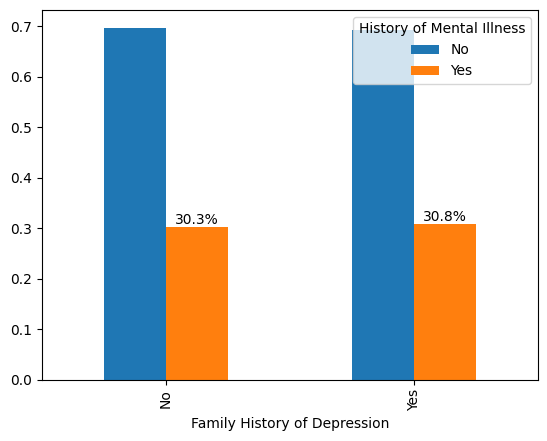

In [21]:
# Chi-squared test
fd = pd.crosstab(data["Family History of Depression"], data["History of Mental Illness"])

ChiSqResult = chi2_contingency(fd)
print("The P-Value of the Chi-Squared Test is: ", ChiSqResult[1])

# Distribution by employment status
fd_prop = fd.apply(lambda r: r / r.sum(), axis = 1)
ax = fd_prop.plot(kind="bar")

bars = ax.containers[1]
ax.bar_label(bars, labels = [f'{x.get_height():.1%}' for x in bars])

The P-Value of the Chi-Squared Test is:  0.00010435052869828637


[Text(0, 0, '30.2%'), Text(0, 0, '30.8%')]

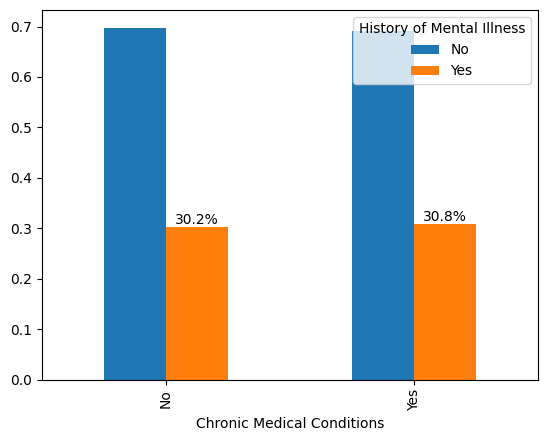

In [22]:
# Chi-squared test
cmc = pd.crosstab(data["Chronic Medical Conditions"], data["History of Mental Illness"])

ChiSqResult = chi2_contingency(cmc)
print("The P-Value of the Chi-Squared Test is: ", ChiSqResult[1])

# Distribution by employment status
cmc_prop = cmc.apply(lambda r: r / r.sum(), axis = 1)
ax = cmc_prop.plot(kind="bar")

bars = ax.containers[1]
ax.bar_label(bars, labels = [f'{x.get_height():.1%}' for x in bars])

In [23]:
# One hot encoding
to_dummy = ["Marital Status", "Smoking Status", "Employment Status", "History of Substance Abuse", "Family History of Depression", "Chronic Medical Conditions"]

one_hot_enc = pd.get_dummies(new_data, columns = to_dummy, dtype = "int")

one_hot_enc.columns

Index(['Name', 'Age', 'Education Level', 'Number of Children',
       'Physical Activity Level', 'Income', 'Alcohol Consumption',
       'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Marital Status_Widowed',
       'Smoking Status_Current', 'Smoking Status_Former',
       'Smoking Status_Non-smoker', 'Employment Status_Employed',
       'Employment Status_Unemployed', 'History of Substance Abuse_No',
       'History of Substance Abuse_Yes', 'Family History of Depression_No',
       'Family History of Depression_Yes', 'Chronic Medical Conditions_No',
       'Chronic Medical Conditions_Yes'],
      dtype='object')

In [24]:
to_drop = ["Name", "History of Mental Illness"]

model_resp = one_hot_enc["History of Mental Illness"]

exp_var = one_hot_enc.loc[:, ~one_hot_enc.columns.isin(to_dummy + to_drop)]

# Scale the explanatory variables
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(exp_var)

model_data=pd.DataFrame(data=data_rescaled, columns= exp_var.columns)

model_data.describe()

,Age,Education Level,Number of Children,Physical Activity Level,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,Marital Status_Divorced,Marital Status_Married,...,Smoking Status_Former,Smoking Status_Non-smoker,Employment Status_Employed,Employment Status_Unemployed,History of Substance Abuse_No,History of Substance Abuse_Yes,Family History of Depression_No,Family History of Depression_Yes,Chronic Medical Conditions_No,Chronic Medical Conditions_Yes
count,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,...,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000
mean,0.500011,0.372758,0.324743,0.381643,0.241250,0.453873,0.381199,0.449023,0.079100,0.581108,...,0.280795,0.597958,0.642048,0.357952,0.688502,0.311498,0.731122,0.268878,0.670813,0.329187
std,0.292883,0.298345,0.309263,0.374860,0.193453,0.378259,0.364558,0.358471,0.269895,0.493378,...,0.449388,0.490311,0.479398,0.479398,0.463106,0.463106,0.443377,0.443377,0.469919,0.469919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241935,0.000000,0.000000,0.000000,0.100005,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.250000,0.500000,0.178670,0.500000,0.500000,0.500000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.758065,0.500000,0.500000,0.500000,0.364847,0.500000,0.500000,0.500000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Train test split
train_data, test_data, train_resp, test_resp = train_test_split(model_data, model_resp, test_size = 0.30, random_state = 20)

#print("Train response mean: %.3f" % train_resp.mean()) 
#print("Test response mean: %.3f" % test_resp.mean())  

print("Train response mean: %.5f" % train_resp.mean()) 
print("Test response mean: %.5f" % test_resp.mean())  

Train response mean: 0.30443
Test response mean: 0.30332


In [26]:
# Define model
model = Lasso(alpha = 1.0, random_state = 20)

# Fit model
model.fit(train_data, train_resp)

# Make predictions
train_pred = model.predict(train_data)
test_pred = model.predict(test_data)

# Result
print("Mean Predicted value (Train): %.5f" % train_pred.mean())
print("Mean Predicted value (Test): %.5f" % test_pred.mean())

Mean Predicted value (Train): 0.30443
Mean Predicted value (Test): 0.30443


In [27]:
# Evaluating the model
rmse = root_mean_squared_error(train_resp, train_pred)
print("RMSE (Train) : %.5f" % rmse)

rmse = root_mean_squared_error(test_resp, test_pred)
print("RMSE (Test) : %.5f" % rmse)
 
r2 = r2_score(train_resp, train_pred)
print("R-squared (Train): %.5f" % r2)
    
r2 = r2_score(test_resp, test_pred)
print("R-squared (Test): %.5f" % r2)

RMSE (Train) : 0.46017
RMSE (Test) : 0.45969
R-squared (Train): 0.00000
R-squared (Test): -0.00001


In [28]:
# Define model
model = RandomForestClassifier()

# Fit model
model.fit(train_data, train_resp)

train_pred = model.predict_proba(X=train_data)[:, 1]
test_pred = model.predict_proba(X=test_data)[:, 1]

# Evaluate the model
auc_train = roc_auc_score(train_resp, train_pred)
auc_test = roc_auc_score(test_resp, test_pred)

print("AUC (Train): %.5f" % auc_train)
print("AUC (Test): %.5f" % auc_test)

test_pred = model.predict(test_data)
print(classification_report(test_resp, test_pred))

AUC (Train): 1.00000
AUC (Test): 0.55234
              precision    recall  f1-score   support

           0       0.70      0.88      0.78     86480
           1       0.35      0.15      0.21     37651

    accuracy                           0.66    124131
   macro avg       0.53      0.51      0.50    124131
weighted avg       0.60      0.66      0.61    124131



In [29]:
test1 = {"max_depth": [None, 2, 3, 4, 10, 12]}

tuning_model = GridSearchCV(estimator=RandomForestClassifier(random_state=20)
    , param_grid=test1, scoring="neg_log_loss", n_jobs=25, cv=5     
)

# effectively tuning
tuning_model.fit(train_data, train_resp)

print(tuning_model.best_params_)
best_max_depth = tuning_model.best_params_["max_depth"]

train_pred = tuning_model.predict_proba(X=train_data)[:, 1]
test_pred = tuning_model.predict_proba(X=test_data)[:, 1]

# Evaluate the model
auc_train = roc_auc_score(train_resp, train_pred)
auc_test = roc_auc_score(test_resp, test_pred)

print("AUC (Train): %.5f" % auc_train)
print("AUC (Test): %.5f" % auc_test)

test_pred = model.predict(test_data)
print(classification_report(test_resp, test_pred))

{'max_depth': 10}
AUC (Train): 0.65365
AUC (Test): 0.59806
              precision    recall  f1-score   support

           0       0.70      0.88      0.78     86480
           1       0.35      0.15      0.21     37651

    accuracy                           0.66    124131
   macro avg       0.53      0.51      0.50    124131
weighted avg       0.60      0.66      0.61    124131



In [30]:
test2 = {"n_estimators": [10, 20, 50, 100, 300, 400]}

tuning_model = GridSearchCV(estimator=RandomForestClassifier(
      max_depth=best_max_depth
    , random_state=20
    )
    , param_grid=test2, scoring="neg_log_loss", n_jobs=25, cv=5
)

# effectively tuning
tuning_model.fit(train_data, train_resp)

print(tuning_model.best_params_)
best_n_estimators = tuning_model.best_params_["n_estimators"]

train_pred = tuning_model.predict_proba(X=train_data)[:, 1]
test_pred = tuning_model.predict_proba(X=test_data)[:, 1]

# Evaluate the model
auc_train = roc_auc_score(train_resp, train_pred)
auc_test = roc_auc_score(test_resp, test_pred)

print("AUC (Train): %.5f" % auc_train)
print("AUC (Test): %.5f" % auc_test)

test_pred = model.predict(test_data)
print(classification_report(test_resp, test_pred))

{'n_estimators': 400}
AUC (Train): 0.65830
AUC (Test): 0.59804
              precision    recall  f1-score   support

           0       0.70      0.88      0.78     86480
           1       0.35      0.15      0.21     37651

    accuracy                           0.66    124131
   macro avg       0.53      0.51      0.50    124131
weighted avg       0.60      0.66      0.61    124131



In [31]:
test3 = {"max_features": ["log2", "sqrt", None, 0.25, 0.5, 0.75, 1.0]}

tuning_model = GridSearchCV(estimator=RandomForestClassifier(
      max_depth=best_max_depth
#   , n_estimators=best_n_estimators
    , random_state=20
    )
    , param_grid=test3, scoring="roc_auc", n_jobs=25, cv=5
)

# effectively tuning
tuning_model.fit(train_data, train_resp)

print(tuning_model.best_params_)
best_max_features = tuning_model.best_params_["max_features"]

train_pred = tuning_model.predict_proba(X=train_data)[:, 1]
test_pred = tuning_model.predict_proba(X=test_data)[:, 1]

# Evaluate the model
auc_train = roc_auc_score(train_resp, train_pred)
auc_test = roc_auc_score(test_resp, test_pred)

print("AUC (Train): %.5f" % auc_train)
print("AUC (Test): %.5f" % auc_test)

test_pred = model.predict(test_data)
print(classification_report(test_resp, test_pred))

{'max_features': 'log2'}
AUC (Train): 0.65365
AUC (Test): 0.59806
              precision    recall  f1-score   support

           0       0.70      0.88      0.78     86480
           1       0.35      0.15      0.21     37651

    accuracy                           0.66    124131
   macro avg       0.53      0.51      0.50    124131
weighted avg       0.60      0.66      0.61    124131



In [32]:
final_model = RandomForestClassifier(
      max_depth=best_max_depth
#   , n_estimators=best_n_estimators
    , max_features=best_max_features
    , random_state=20
    )

final_model.fit(train_data, train_resp)

train_pred = final_model.predict_proba(X=train_data)[:, 1]
test_pred = final_model.predict_proba(X=test_data)[:, 1]

# Evaluate the model
auc_train = roc_auc_score(train_resp, train_pred)
auc_test = roc_auc_score(test_resp, test_pred)

print("AUC (Train): %.5f" % auc_train)
print("AUC (Test): %.5f" % auc_test)

AUC (Train): 0.65365
AUC (Test): 0.59806


                            Variable       Imp
4                             Income  0.309783
16      Employment Status_Unemployed  0.165346
15        Employment Status_Employed  0.150074
1                    Education Level  0.080009
0                                Age  0.065784
12            Smoking Status_Current  0.041656
6                     Dietary Habits  0.024006
7                     Sleep Patterns  0.020222
2                 Number of Children  0.020072
5                Alcohol Consumption  0.017520
3            Physical Activity Level  0.016926
14         Smoking Status_Non-smoker  0.012189
13             Smoking Status_Former  0.010719
18    History of Substance Abuse_Yes  0.007731
17     History of Substance Abuse_No  0.007726
19   Family History of Depression_No  0.007579
21     Chronic Medical Conditions_No  0.007510
20  Family History of Depression_Yes  0.007491
22    Chronic Medical Conditions_Yes  0.007349
9             Marital Status_Married  0.006804
11           

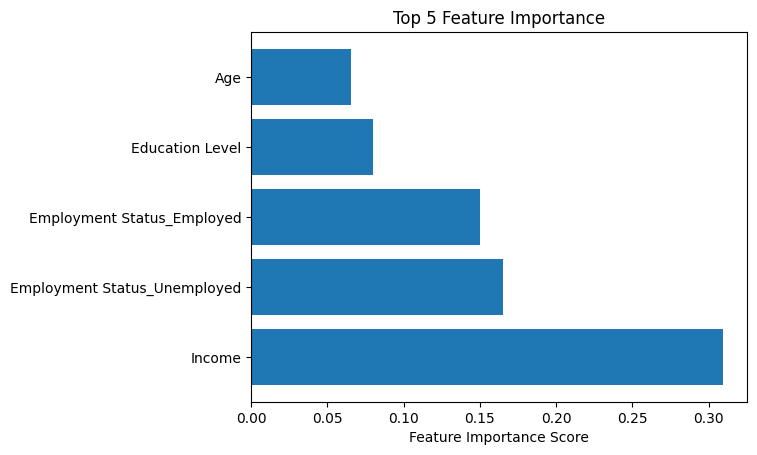

In [33]:
# Feature Importance
FeatureImp = pd.DataFrame(list(train_data.columns)).copy()
FeatureImp.insert(len(FeatureImp.columns), 'Imp', final_model.feature_importances_.transpose())
FeatureImp = FeatureImp[FeatureImp.Imp != 0]
FeatureImp.rename(columns={0: 'Variable'}, inplace=True)
FeatureImp = FeatureImp.sort_values(by='Imp', ascending=False)
print(FeatureImp)

# Plot top-25 of the highest Feature Importance
plt.clf()
plt.barh(FeatureImp['Variable'].head(5), FeatureImp['Imp'].head(5))
plt.title('Top 5 Feature Importance')
plt.xlabel('Feature Importance Score')
plt.show()

In [34]:
# Scoring Data for Analysis
Scored_Data = one_hot_enc[["History of Mental Illness"]]
Scored_Data["Model Prediction"] = final_model.predict(model_data)
Scored_Data["Model ProbScore"] = final_model.predict_proba(model_data)[:, 1]

Scored_Data.head(5)

# Save scores in csv
Scored_Data.to_csv(dir + "scored_data.csv", index=False)

C:\Users\H_Chan\AppData\Local\Temp\8\ipykernel_10176\2095936171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scored_Data["Model Prediction"] = final_model.predict(model_data)
C:\Users\H_Chan\AppData\Local\Temp\8\ipykernel_10176\2095936171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scored_Data["Model ProbScore"] = final_model.predict_proba(model_data)[:, 1]
